### This notebook processes this project's hypothesis 2: 
#### We expect the waste production trend to be downwards and recovery % to be upwards, especially post 2015 when all UN members agreed to UN’s Sustainable Development Goals (Goal 13: Climate action- Take urgent action to combat climate change and its impacts). The Paris Climate Change Agreement was also launched in 2015 making the hypothesis more sound.

In [1]:
%matplotlib inline

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

import datetime
from IPython.display import display, HTML
import Hypothesis_2and3 as hyp

##### Import the dataframe

In [2]:
clean_df = pd.read_csv("clean_df.csv")

In [3]:
pd.set_option('display.max_columns', None)
clean_df.head()

,Unnamed: 0,Year,COU,Country,Composting%,Disposal%,Landfill%,Material_recovery%,Recovery%,Recycling%,Amt_for_recovery_operations,Composting,Electronic_waste,Household_waste,Landfill,Municipal_waste_generated,Municipal_waste_generated_percapita,Municipal_waste_generated_1990,Municipal_waste_generated_2000,Municipal_waste_treated,Recycling,Total_Incineration,Waste_from_households,Country_y,CO2_emissions_percapita,Female_education_attainment_bach,Male_education_attainment_bach,Total_education_attainment_bach,Energy_use_percapita,Forest_area,GDP_2015_USD,GDP_growth%,GDP_percapita_2015_USD,GDP_percapita_growth%,Education_expense_%_of_gdp,Education_expense_%_of_total_exp,Population_density,Population_growth%,Population_female,Population_female_%,Population_total,Poverty_headcount%_ppp,Poverty_headcount%_national_line,Population_urban%,Population_urban_growth%
0,0,1990,AUT,Austria,23.171,56.277,56.277,34.529,43.723,11.358,1536.0,814.0,NaN,NaN,1977.0,3204.0,414.814,100.0,68.963,3513.0,399.0,312.0,2504.0,Austria,7.589364,NaN,NaN,NaN,3240.111359,37756.7,2.406290e+11,4.345641,31340.681293,3.553548,4.95725,11.513110,93.042293,0.762002,4005232,52.166067,7677850,NaN,NaN,62.960,0.332494
1,1,1990,BEL,Belgium,5.983,66.751,43.853,11.108,33.249,5.125,1317.0,237.0,NaN,NaN,1737.0,3436.0,343.375,100.0,71.131,3961.0,203.0,1784.0,2884.0,Belgium,10.966775,NaN,NaN,NaN,4809.867268,7632.0,2.934562e+11,3.137402,29441.662148,2.830268,NaN,NaN,NaN,0.298236,5090672,51.073323,9967379,NaN,NaN,96.377,0.386473
2,2,1990,CHE,Switzerland,6.341,22.680,22.680,28.547,77.320,22.207,3170.6,260.0,NaN,NaN,930.0,4100.6,616.366,100.0,86.675,4100.6,910.6,2000.0,2733.7,Switzerland,6.452219,NaN,NaN,NaN,3627.692811,11535.0,4.714249e+11,3.674626,70199.323900,2.615466,4.38825,17.181641,169.888411,1.026873,3437405,51.185991,6715519,NaN,NaN,73.926,0.945759
3,3,1990,CHN,China (People's Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67668.0,NaN,100.0,57.254,NaN,NaN,NaN,NaN,China,1.914543,NaN,NaN,NaN,766.995329,1571405.9,1.027377e+12,3.920251,905.030859,2.406559,NaN,NaN,120.448249,1.467303,552721134,48.689961,1135185000,72.0,NaN,26.442,4.309678
4,4,1990,DEU,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49857.0,630.670,100.0,94.408,NaN,NaN,NaN,NaN,Germany,12.026609,NaN,NaN,NaN,4421.364531,113000.0,2.342139e+12,5.255006,29485.709974,4.351639,NaN,NaN,227.517054,0.861969,41104568,51.747451,79433029,NaN,NaN,73.118,1.056365


In [4]:
#subset df with only required columns
#time trend plots
#hist plot
#bar graphs
#box plots for summary stats
#corr plot
#pairwise plot
#correlation matrix
#corr test (spearman)
#conclusion

In [5]:
clean_df.columns

Index(['Unnamed: 0', 'Year', 'COU', 'Country', 'Composting%', 'Disposal%',
       'Landfill%', 'Material_recovery%', 'Recovery%', 'Recycling%',
       'Amt_for_recovery_operations', 'Composting', 'Electronic_waste',
       'Household_waste', 'Landfill', 'Municipal_waste_generated',
       'Municipal_waste_generated_percapita', 'Municipal_waste_generated_1990',
       'Municipal_waste_generated_2000', 'Municipal_waste_treated',
       'Recycling', 'Total_Incineration', 'Waste_from_households', 'Country_y',
       'CO2_emissions_percapita', 'Female_education_attainment_bach',
       'Male_education_attainment_bach', 'Total_education_attainment_bach',
       'Energy_use_percapita', 'Forest_area', 'GDP_2015_USD', 'GDP_growth%',
       'GDP_percapita_2015_USD', 'GDP_percapita_growth%',
       'Education_expense_%_of_gdp', 'Education_expense_%_of_total_exp',
       'Population_density', 'Population_growth%', 'Population_female',
       'Population_female_%', 'Population_total', 'Poverty_head

In [6]:
clean_df["Country"].unique()

array(['Austria', 'Belgium', 'Switzerland',
       "China (People's Republic of)", 'Germany', 'Spain',
       'United Kingdom', 'Greece', 'Hungary', 'Italy', 'Japan', 'Korea',
       'Luxembourg', 'Netherlands', 'Norway', 'New Zealand', 'Poland',
       'Portugal', 'Sweden', 'United States', 'Mexico', 'Türkiye',
       'Australia', 'Finland', 'France', 'Slovak Republic', 'Denmark',
       'Czech Republic', 'Cyprus', 'Estonia', 'Ireland', 'Iceland',
       'Lithuania', 'Latvia', 'Slovenia', 'Canada', 'Russia', 'Brazil',
       'Chile', 'Israel', 'Indonesia', 'Colombia', 'Costa Rica', 'India'],
      dtype=object)

#### Cleaning Data further for my analysis

Removing countries where columns "Recovery%" or "Municipal_waste_generated_percapita" has all null or nan values

In [7]:
df1 = hyp.clean_data1(clean_df.copy(deep = True), ["Recovery%", "Municipal_waste_generated_percapita"])

In [8]:
print(list((df1["Country"].unique())))

['Austria', 'Belgium', 'Switzerland', 'Germany', 'Spain', 'United Kingdom', 'Greece', 'Hungary', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Sweden', 'United States', 'Mexico', 'Türkiye', 'Australia', 'Finland', 'France', 'Slovak Republic', 'Denmark', 'Czech Republic', 'Estonia', 'Ireland', 'Iceland', 'Lithuania', 'Latvia', 'Slovenia', 'Canada', 'Chile', 'Israel', 'Colombia', 'Costa Rica']


### Time Series Trend for Recovery Percentage

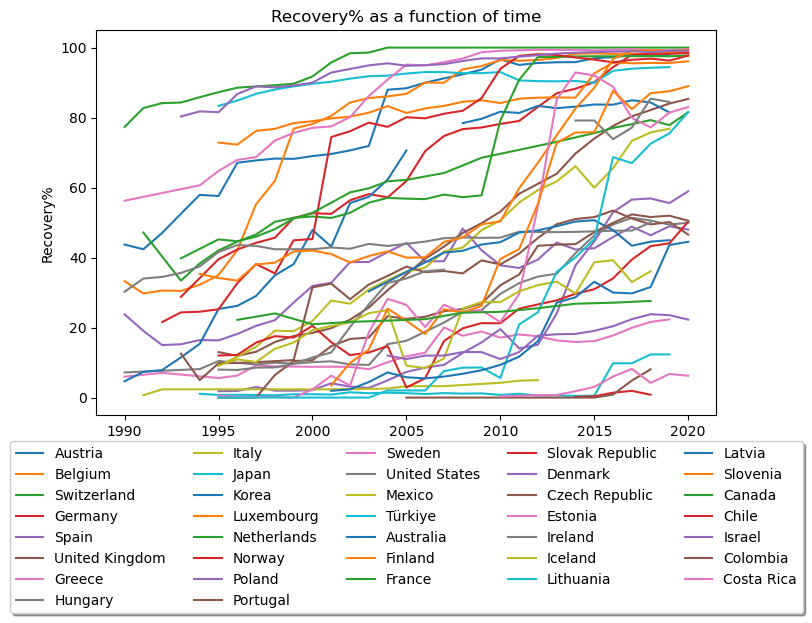

In [9]:
fig, ax = hyp.time_series(df1.copy(deep = True), "Recovery%")
plt.show()

Recovery% as a function of time


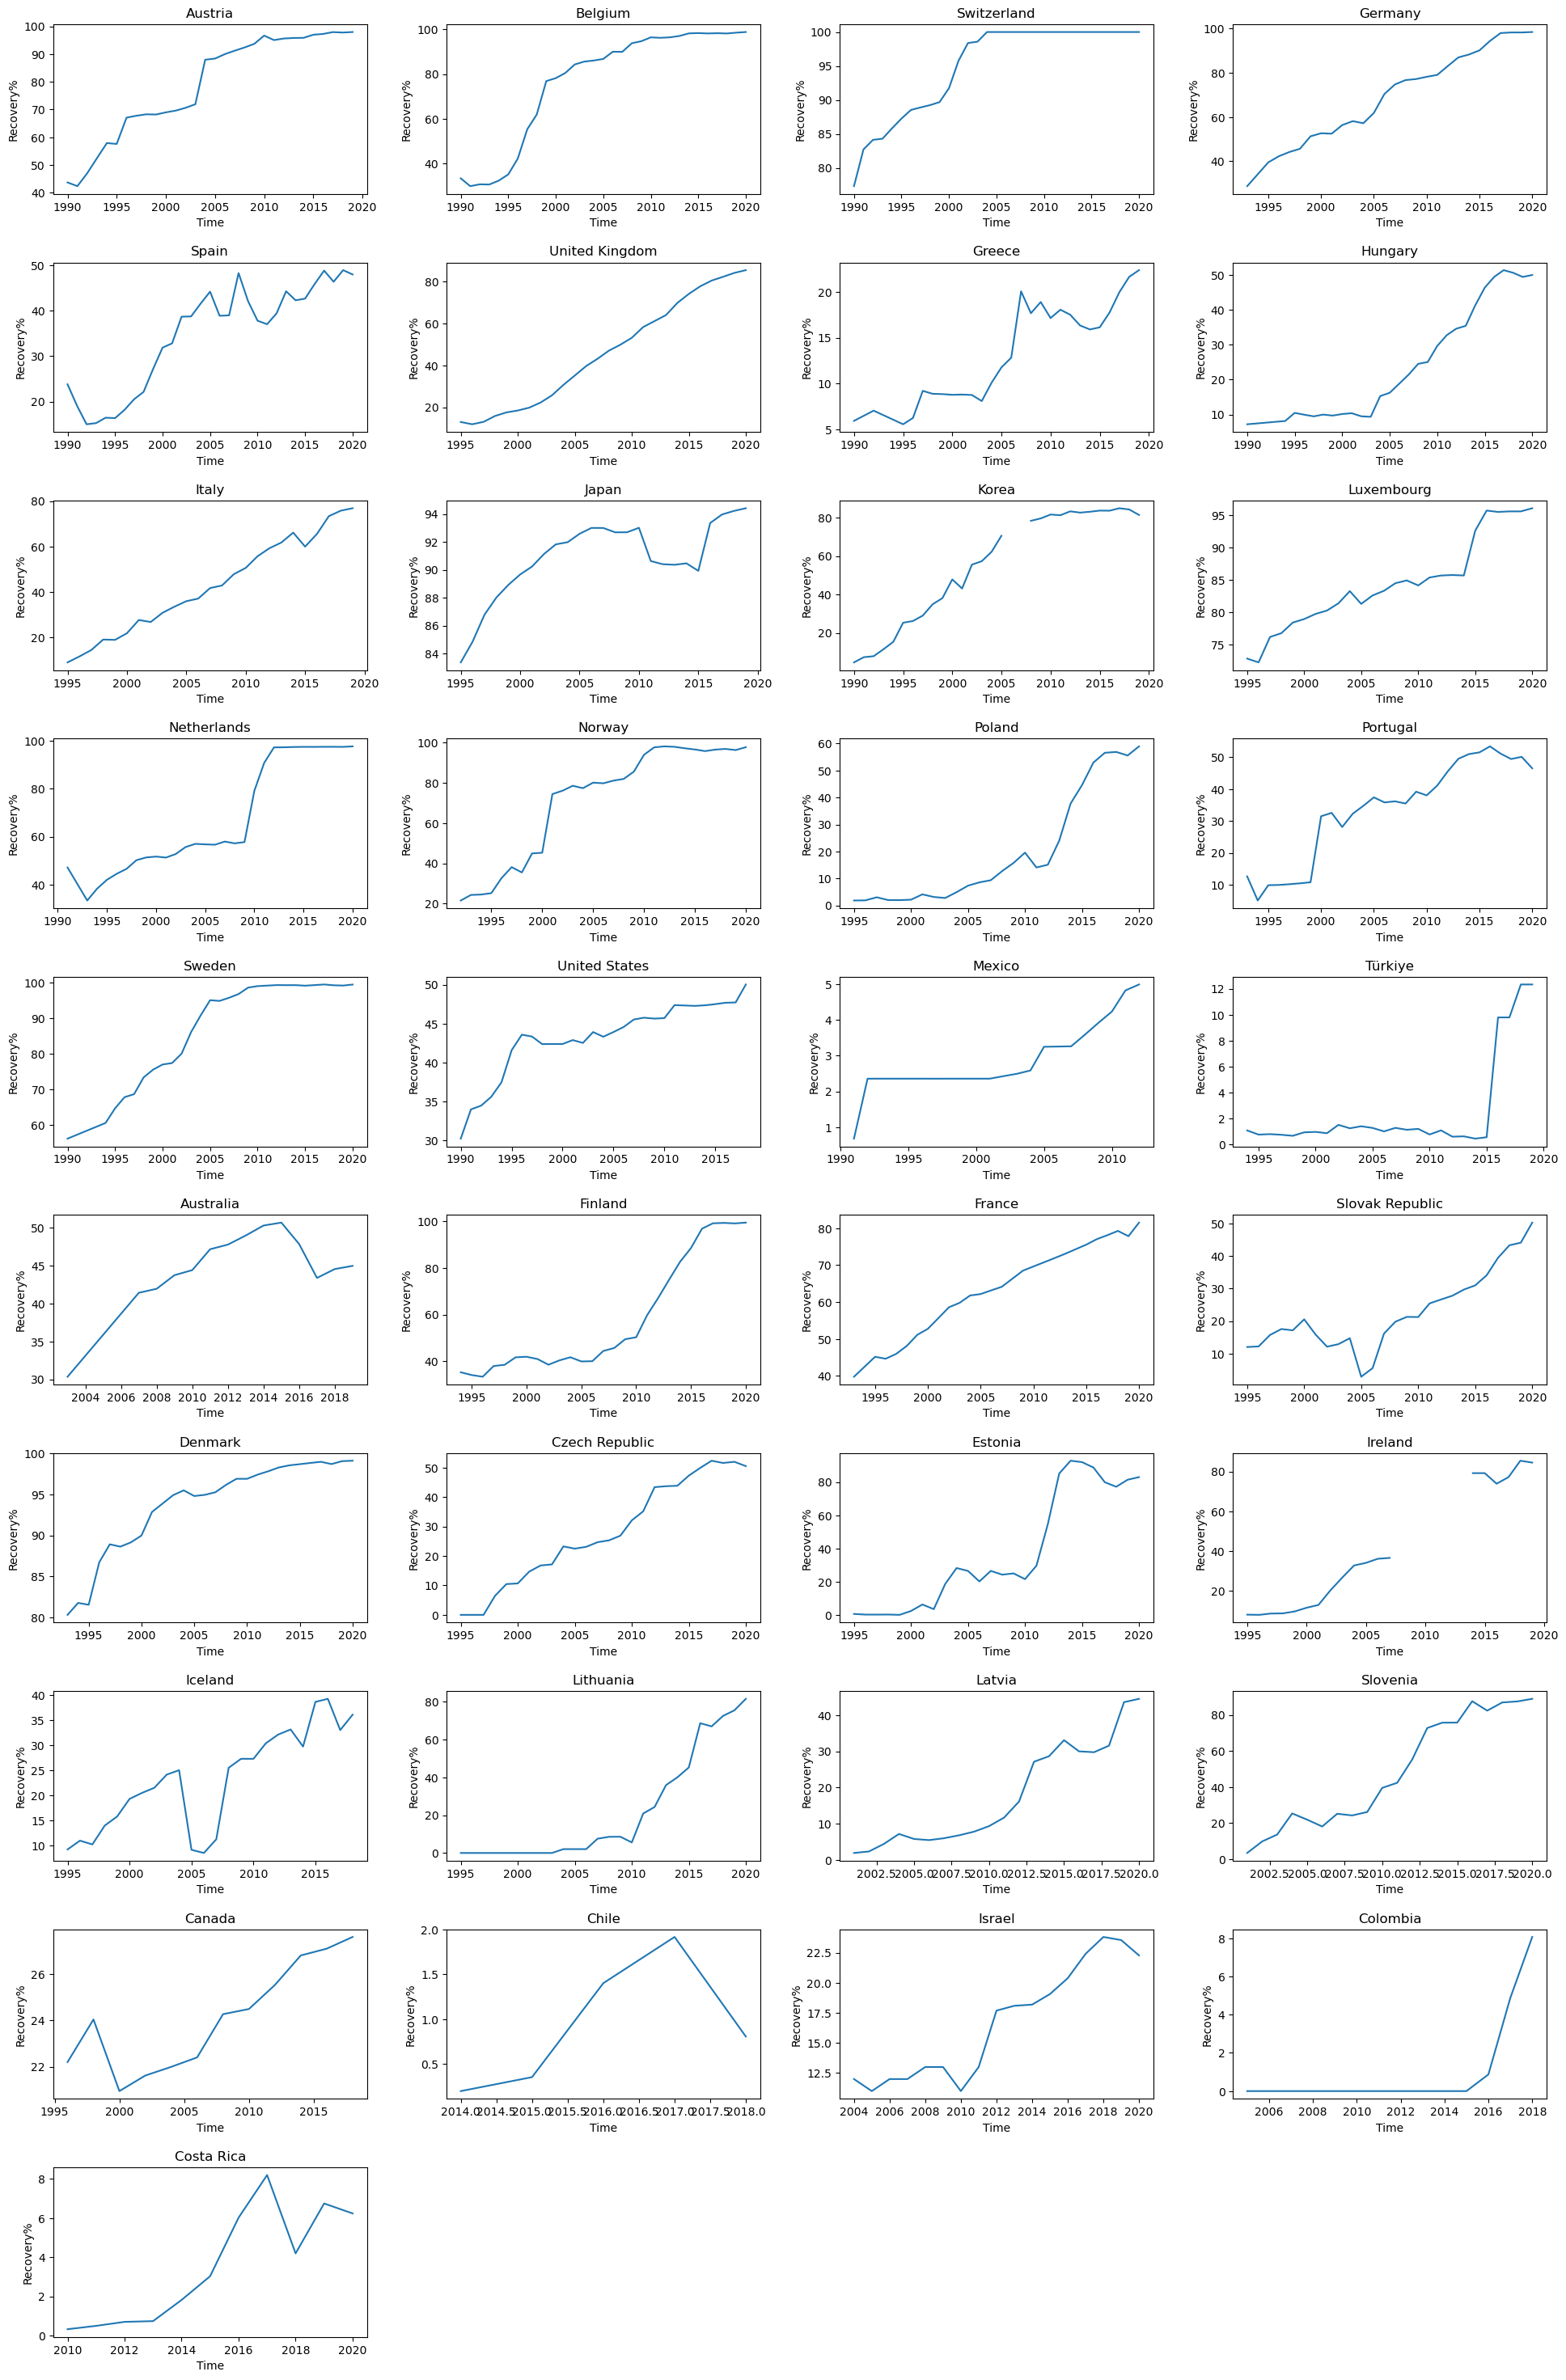

In [10]:
fig, axs = hyp.time_series_subplots(df1.copy(deep = True), "Recovery%")
print("Recovery% as a function of time")
plt.show()


#### Observations 1
1. Most of the countries show an increasing trend of "Recovery%" with time.
1. Countries like Costa Rica, Chile show an increasing trend first but decrease after a point. The "Recovery%" of Chile stays under 2% that is really less. Costa Rica's Recovery % oscillates between 4% to 6% after the year 2016.
1. The Recovery% of Mexico also reaches 5% only at the highest point in the graph. 
1. Austria, Belgium, Switzerland, Germany, Denmark and other european nations show a high growth and high magnitude of Recovery%. 

### Time Series Trend for Municipal waste generated per capita

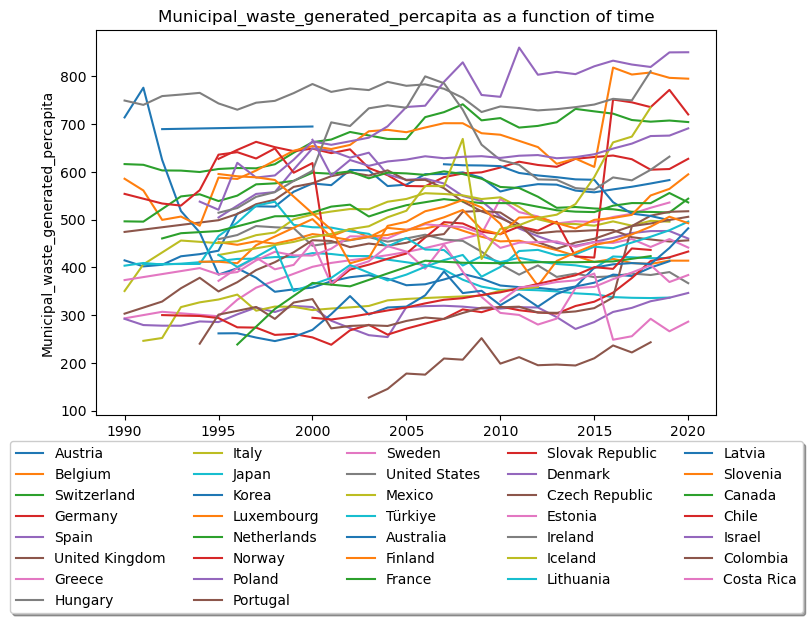

In [11]:
fig, ax = hyp.time_series(df1.copy(deep = True), "Municipal_waste_generated_percapita")
plt.show()

Municipal_waste_generated_percapita as a function of time


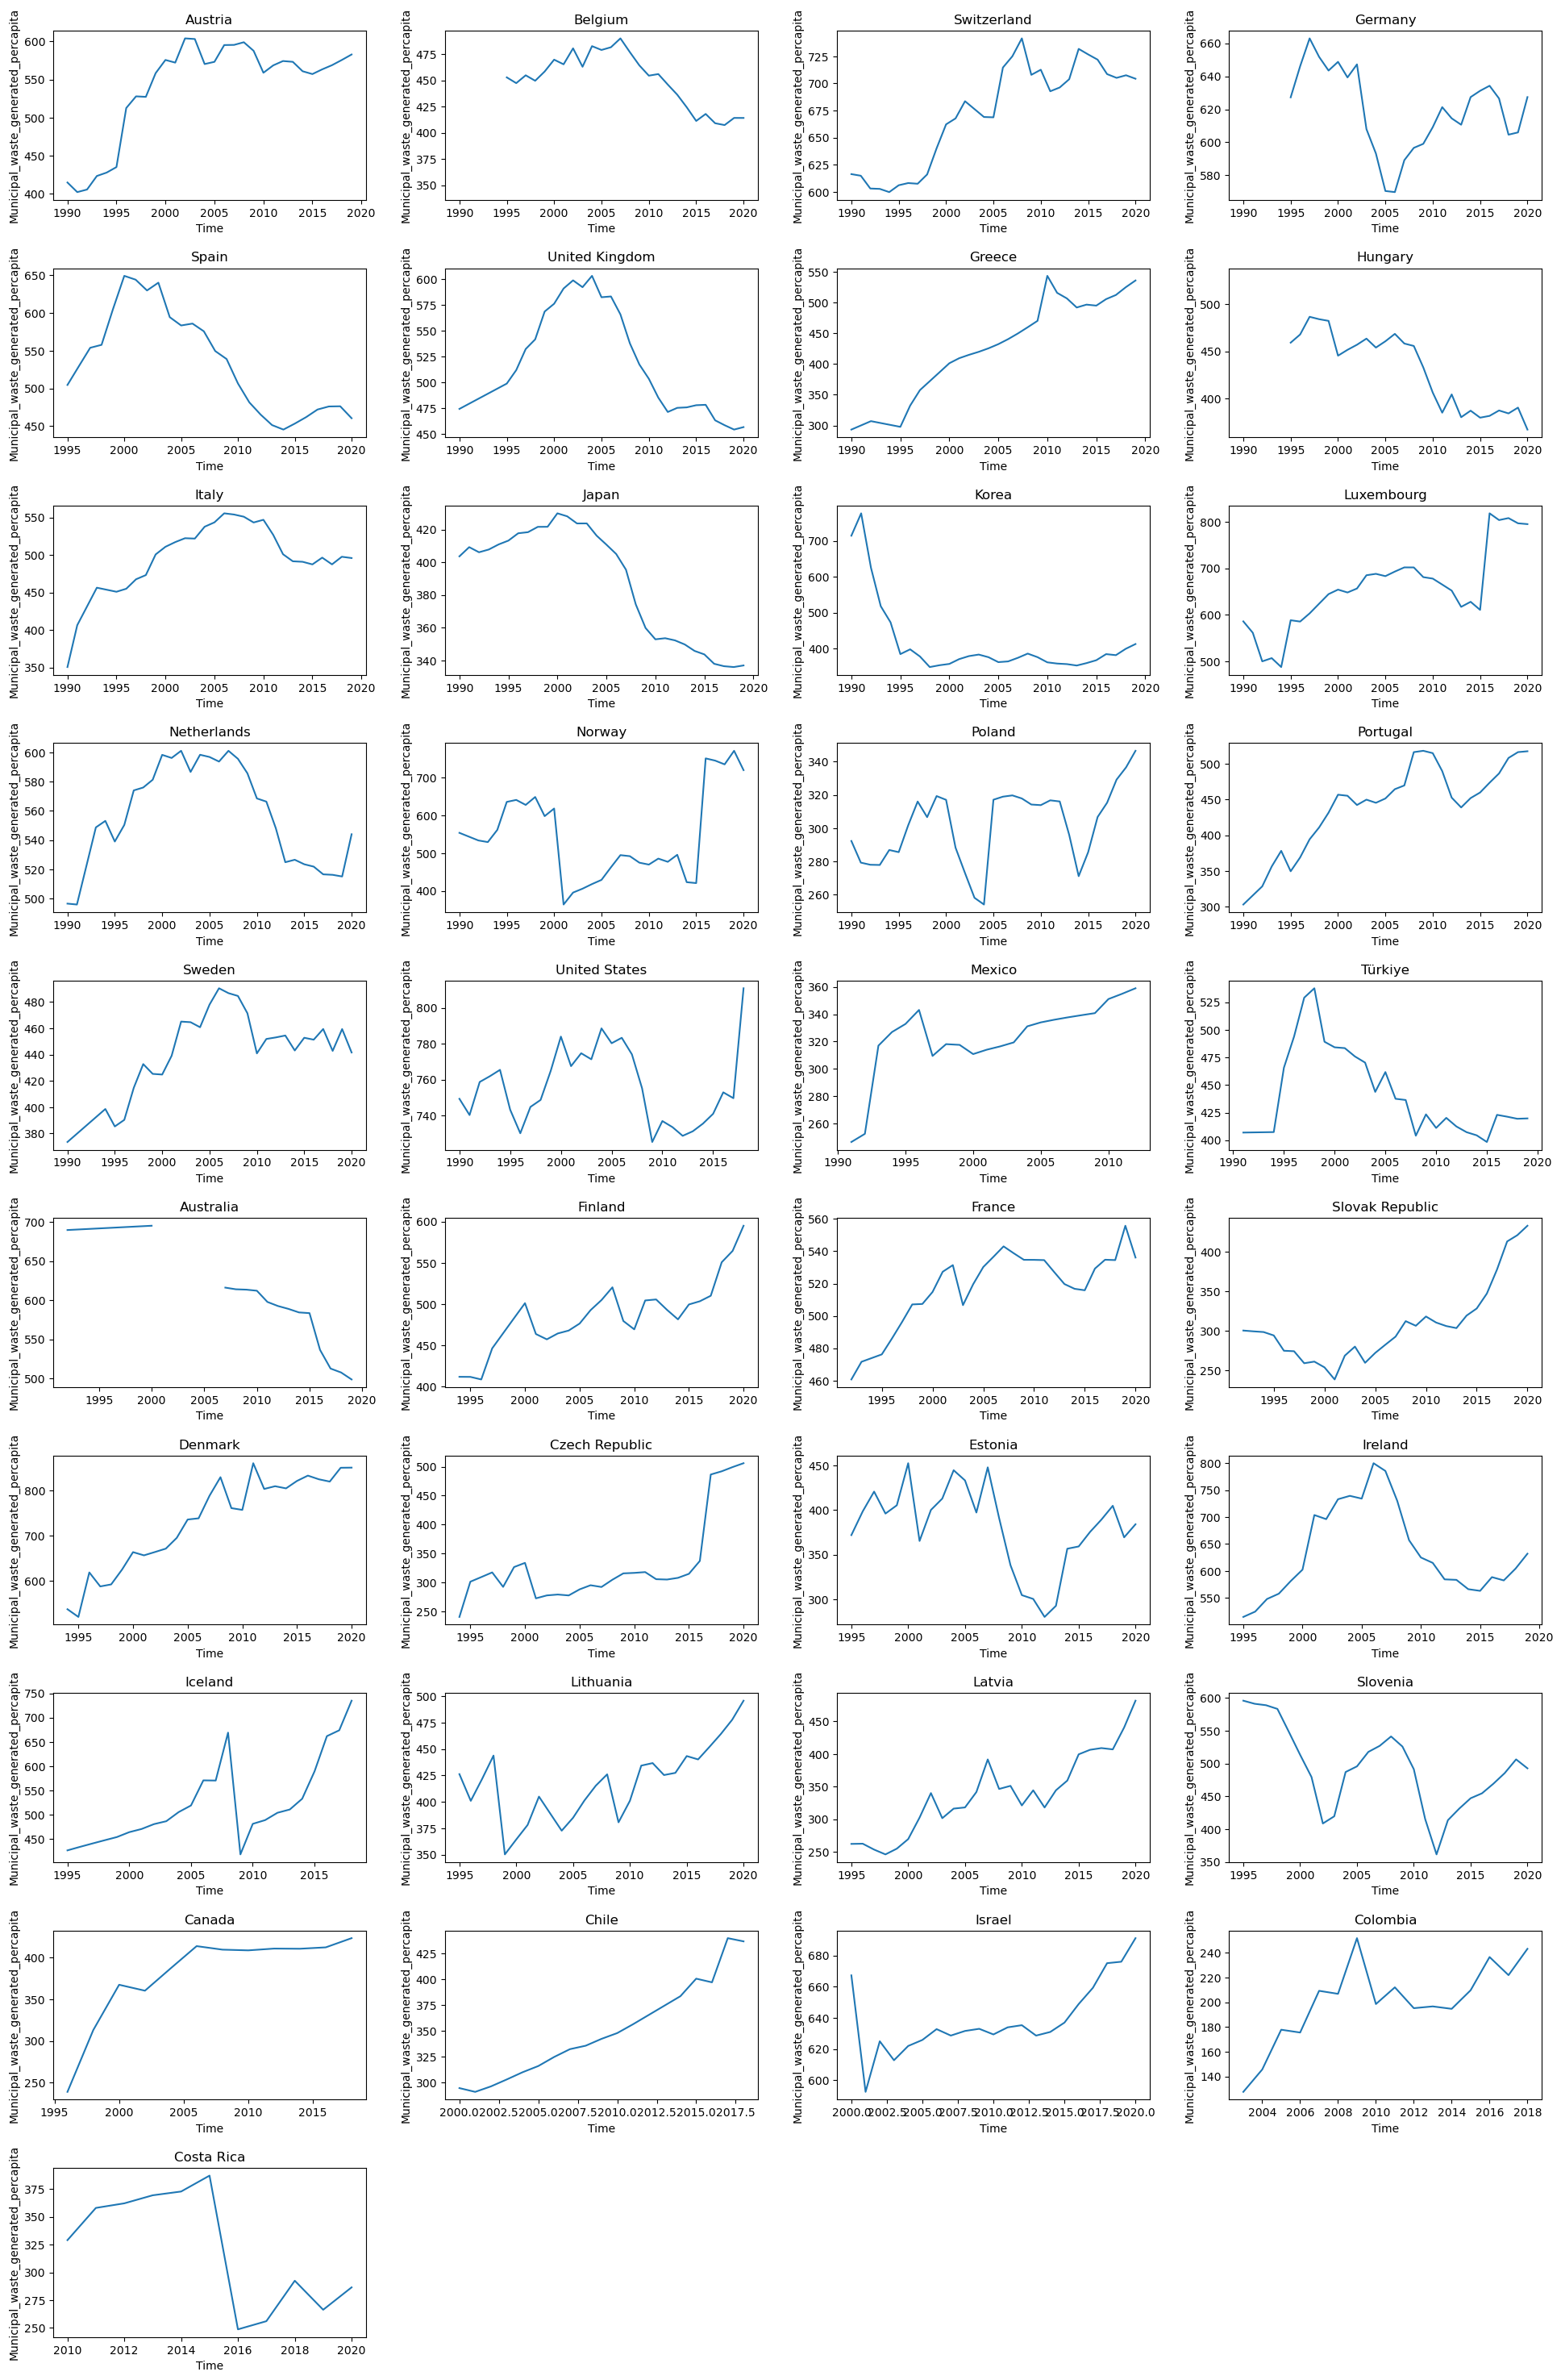

In [12]:
fig, axs = hyp.time_series_subplots(df1.copy(deep = True), "Municipal_waste_generated_percapita")
print("Municipal_waste_generated_percapita as a function of time")
plt.show()


#### Observations 2
1. Countries show varied trend of Municipal waste generated. While some increase overall, the others show a decreasing trend of generation of Municipal waste.  
1. Austria, Switzerland, Greece, Poland, Chile, Israel and others show an increasing overall trend for municipal waste generated per capita.
1. Spain, Hungary, Korea, Japan, Mexico and other similar countries show a decreasing overall trend. 

### Correlation between Recovery% and Municipal_waste_generated_percapita for each country

In [13]:
corr_list = hyp.calculate_correlation(df1.copy(deep = True), ["Recovery%", "Municipal_waste_generated_percapita"])
cnt = 1
for i1 in corr_list:
    print(i1, end = " ")
    if cnt%3==0:
        print(" ")
    cnt+=1

['Austria', 0.5572858731924359] ['Belgium', -0.41086691086691085] ['Switzerland', 0.8694926362976931]  
['Germany', -0.35014532910447393] ['Spain', -0.5138461538461538] ['United Kingdom', -0.7264957264957265]  
['Greece', 0.8785103785103784] ['Hungary', -0.8742368742368741] ['Italy', 0.09]  
['Japan', -0.5930769230769232] ['Korea', -0.43076081007115485] ['Luxembourg', 0.6218803418803419]  
['Netherlands', -0.3748768472906403] ['Norway', -0.04236453201970442] ['Poland', 0.29914529914529914]  
['Portugal', 0.7006020799124247] ['Sweden', 0.48166392993979196] ['United States', -0.19408866995073887]  
['Mexico', 0.8553352456987146] ['Türkiye', 0.04308428854215206] ['Australia', -0.43956043956043955]  
['Finland', 0.8547008547008547] ['France', 0.6697191697191697] ['Slovak Republic', 0.7723076923076921]  
['Denmark', 0.9320714503342439] ['Czech Republic', 0.5203559206439992] ['Estonia', -0.4625641025641026]  
['Ireland', 0.3887670404972986] ['Iceland', 0.5066318884715499] ['Lithuania', 0.713

#### Based on spearman corrrelation we group the countries into 3 groups and observe their trends
* Groups are made on the basis of spearman correlation values
* Group 1 corr<0.-25 (this shows that one variable increases while other decreases or vice versa)
* Group 2 corr>0.25 (this shows that both variables increase or decrease)
* Group 3 -0.25<corr<0.25 (this shows variables show less correlation)

In [14]:
# Groups are made on the basis of spearman correlation values
# Group 1 corr<0.-25 (this shows that one variable increases while other decreases)
# Group 2 corr>0.25 (this shows that both variables increase)
# Group 3 -0.25<corr<0.25 (this shows variables show less correlation)

corr_list1, corr_list2, corr_list3 = hyp.country_groups(corr_list)

In [15]:
corr_list1


[['Belgium', -0.41086691086691085],
 ['Germany', -0.35014532910447393],
 ['Spain', -0.5138461538461538],
 ['United Kingdom', -0.7264957264957265],
 ['Hungary', -0.8742368742368741],
 ['Japan', -0.5930769230769232],
 ['Korea', -0.43076081007115485],
 ['Netherlands', -0.3748768472906403],
 ['Australia', -0.43956043956043955],
 ['Estonia', -0.4625641025641026],
 ['Costa Rica', -0.6272727272727273]]

In [16]:
corr_list2

[['Austria', 0.5572858731924359],
 ['Switzerland', 0.8694926362976931],
 ['Greece', 0.8785103785103784],
 ['Luxembourg', 0.6218803418803419],
 ['Poland', 0.29914529914529914],
 ['Portugal', 0.7006020799124247],
 ['Sweden', 0.48166392993979196],
 ['Mexico', 0.8553352456987146],
 ['Finland', 0.8547008547008547],
 ['France', 0.6697191697191697],
 ['Slovak Republic', 0.7723076923076921],
 ['Denmark', 0.9320714503342439],
 ['Czech Republic', 0.5203559206439992],
 ['Ireland', 0.3887670404972986],
 ['Iceland', 0.5066318884715499],
 ['Lithuania', 0.7132454315733273],
 ['Latvia', 0.7954887218045112],
 ['Canada', 0.7062937062937064],
 ['Chile', 0.7],
 ['Israel', 0.8244119361428751],
 ['Colombia', 0.584108784600011]]

In [17]:
corr_list3

[['Italy', 0.09],
 ['Norway', -0.04236453201970442],
 ['United States', -0.19408866995073887],
 ['Türkiye', 0.04308428854215206],
 ['Slovenia', -0.08571428571428572]]

### Analysing different country groups

#### Group 1

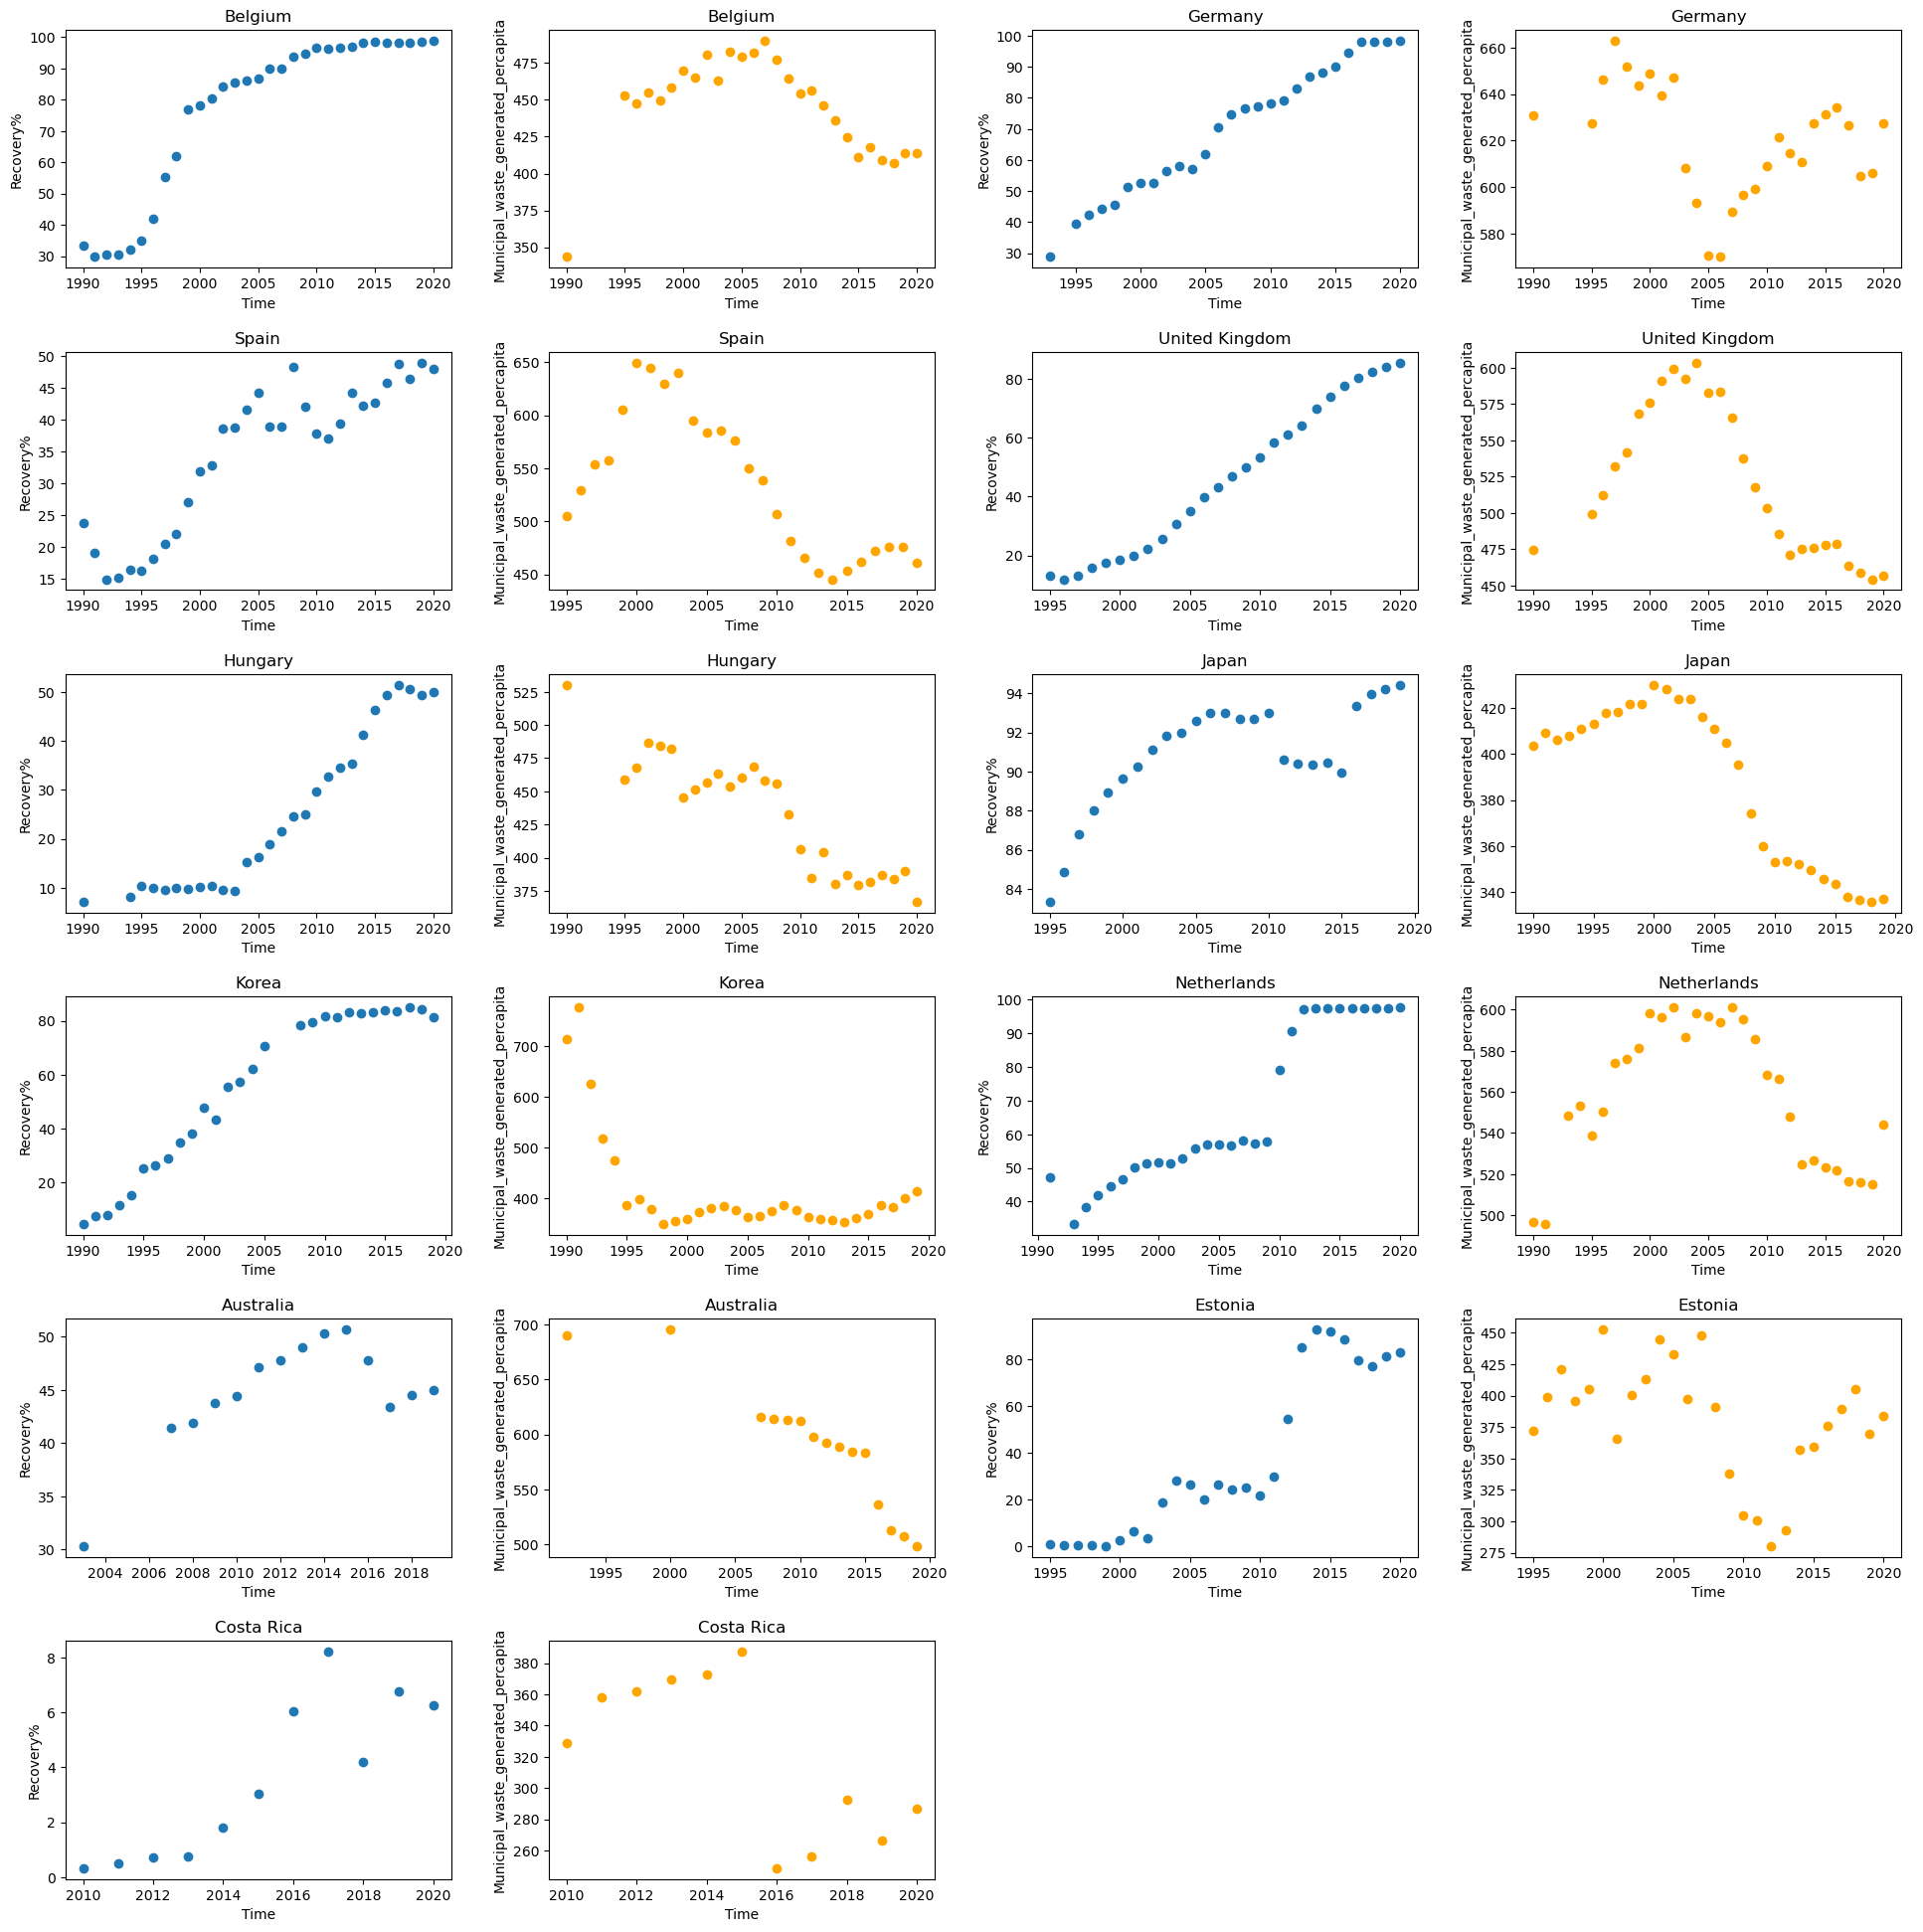

In [18]:
fig, axs = hyp.group_time_series(df1, corr_list1, (20,20), ["Recovery%", "Municipal_waste_generated_percapita"])
plt.show()

#### Observations 3
1. The countries shown in the above group show a negative correlation. We expect that there will be a rising trend for Recovery % and a decreasing trend for Municipal waste generated per capita. 
1. Almost all the countries show the above mentioned trend. Some countries like spain and united kingdom have an initial increase in Municipal waste generated per capita but later it decreases overall. 

#### Group 2

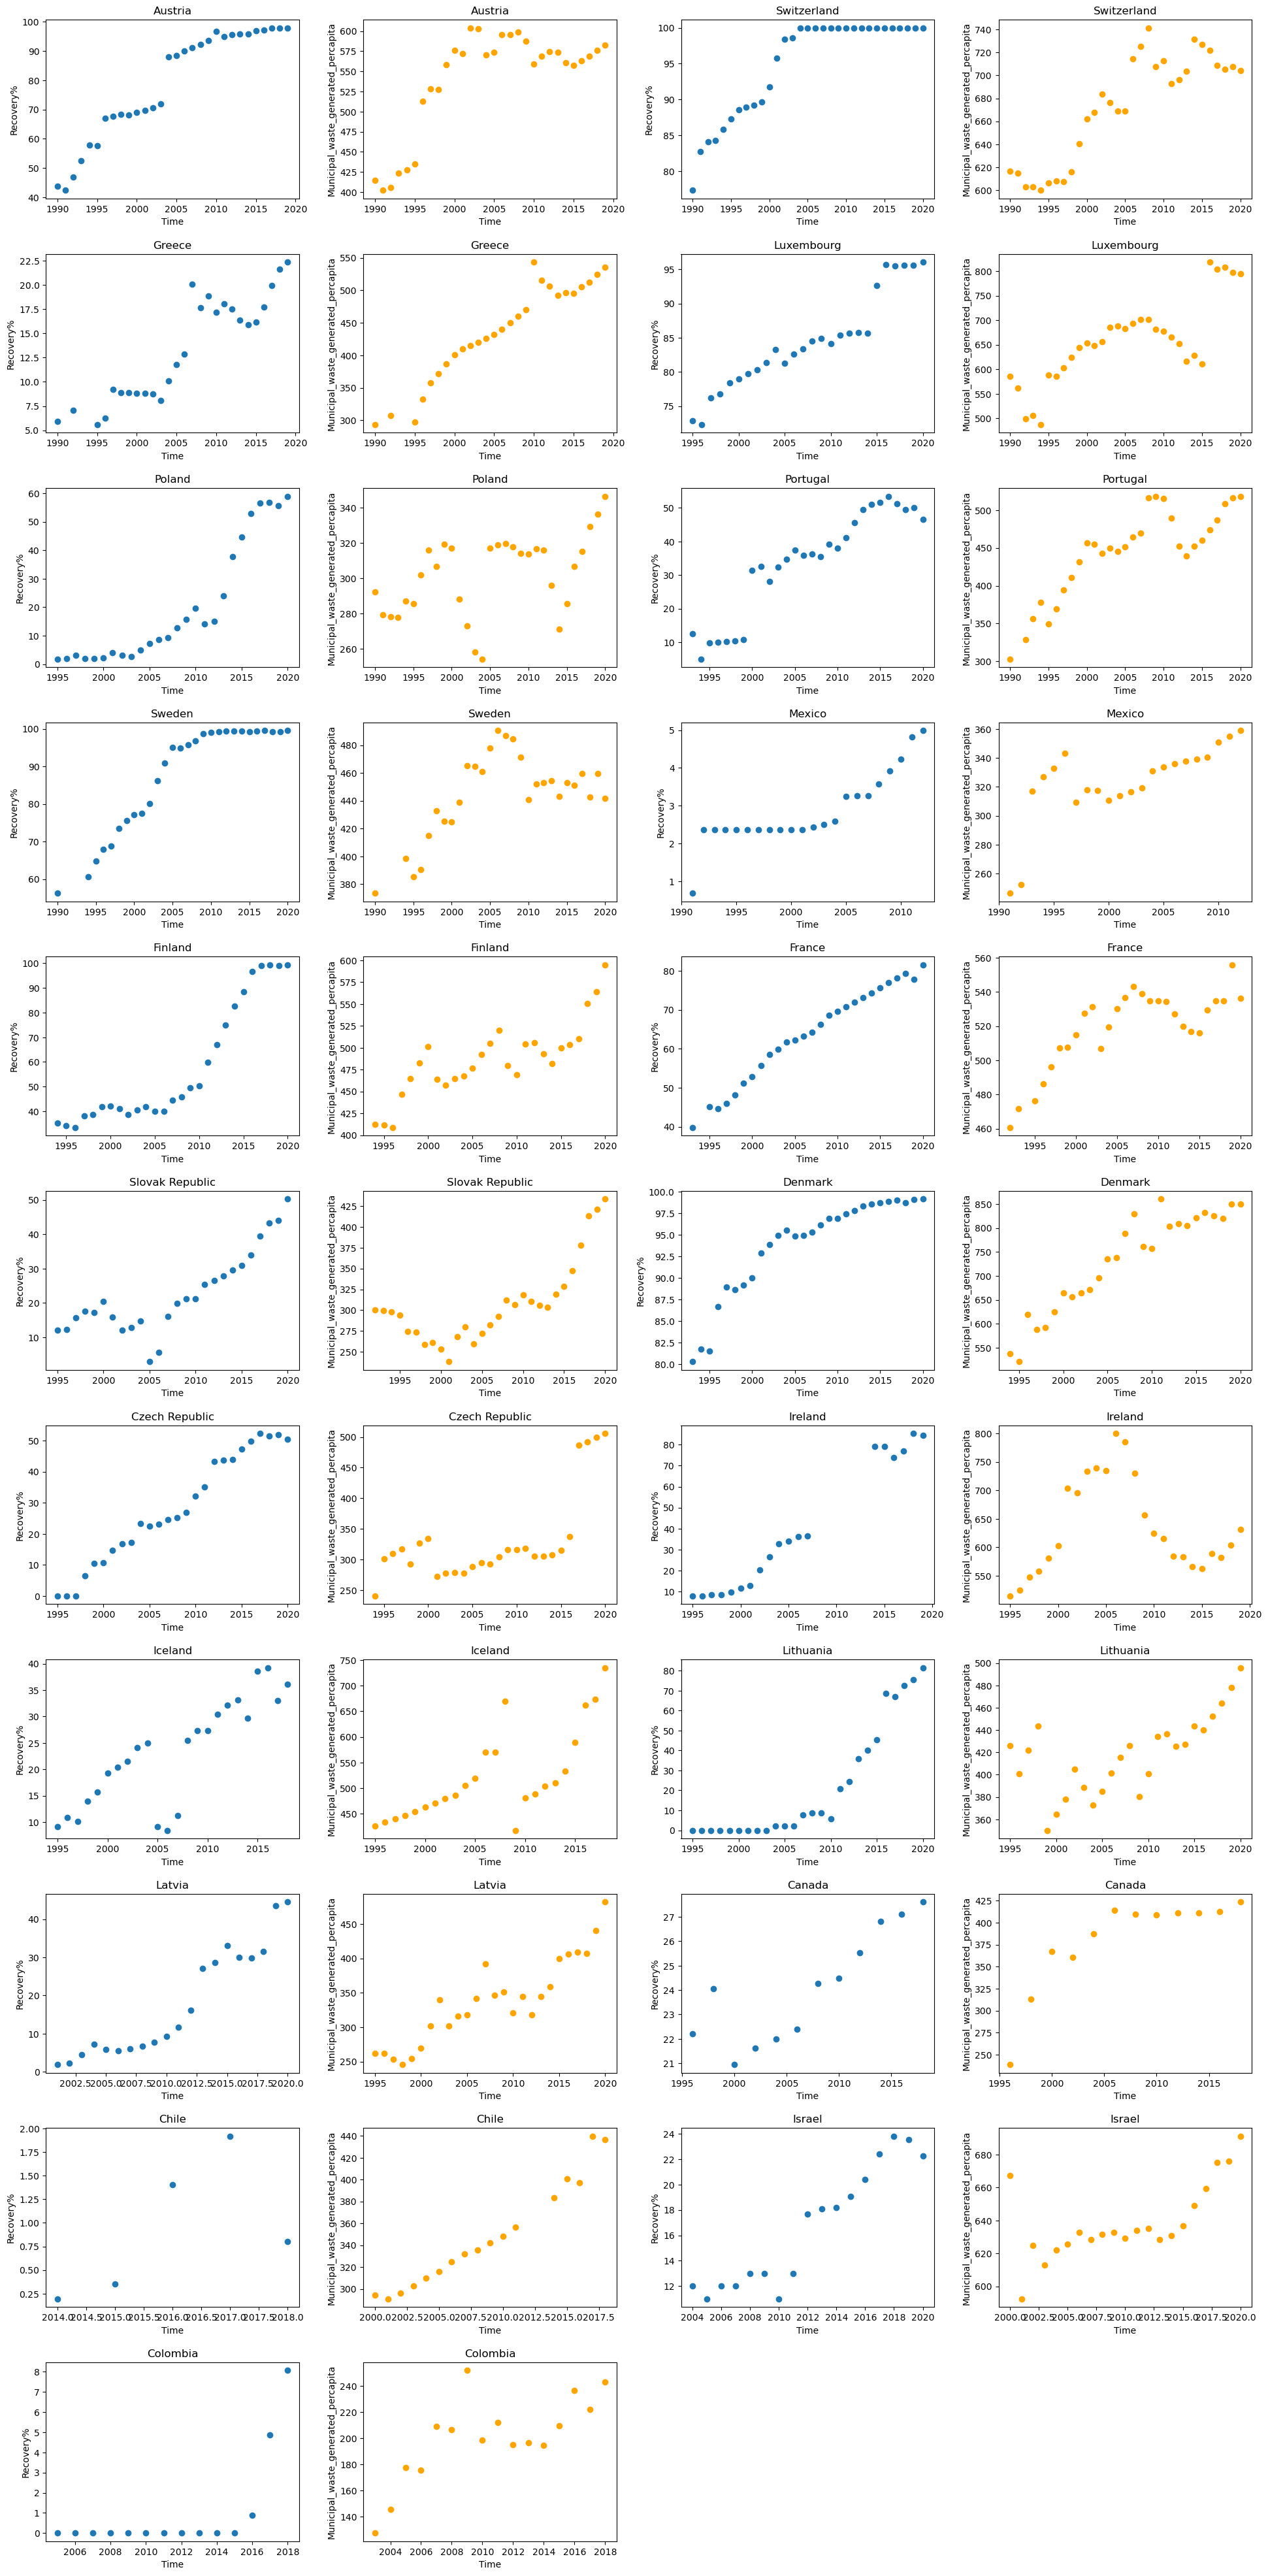

In [19]:
fig, axs = hyp.group_time_series(df1, corr_list2, (20,40), ["Recovery%", "Municipal_waste_generated_percapita"])
plt.show()

#### Observations 4
1. The countries shown in the above group show a positive correlation. We expect that there will be either a rising or decreasing trend for both Recovery % and Municipal waste generated per capita. 
1. Almost all the countries show the an overall increase in both Recovery % and Municipal waste generated per capita. 


#### Group 3

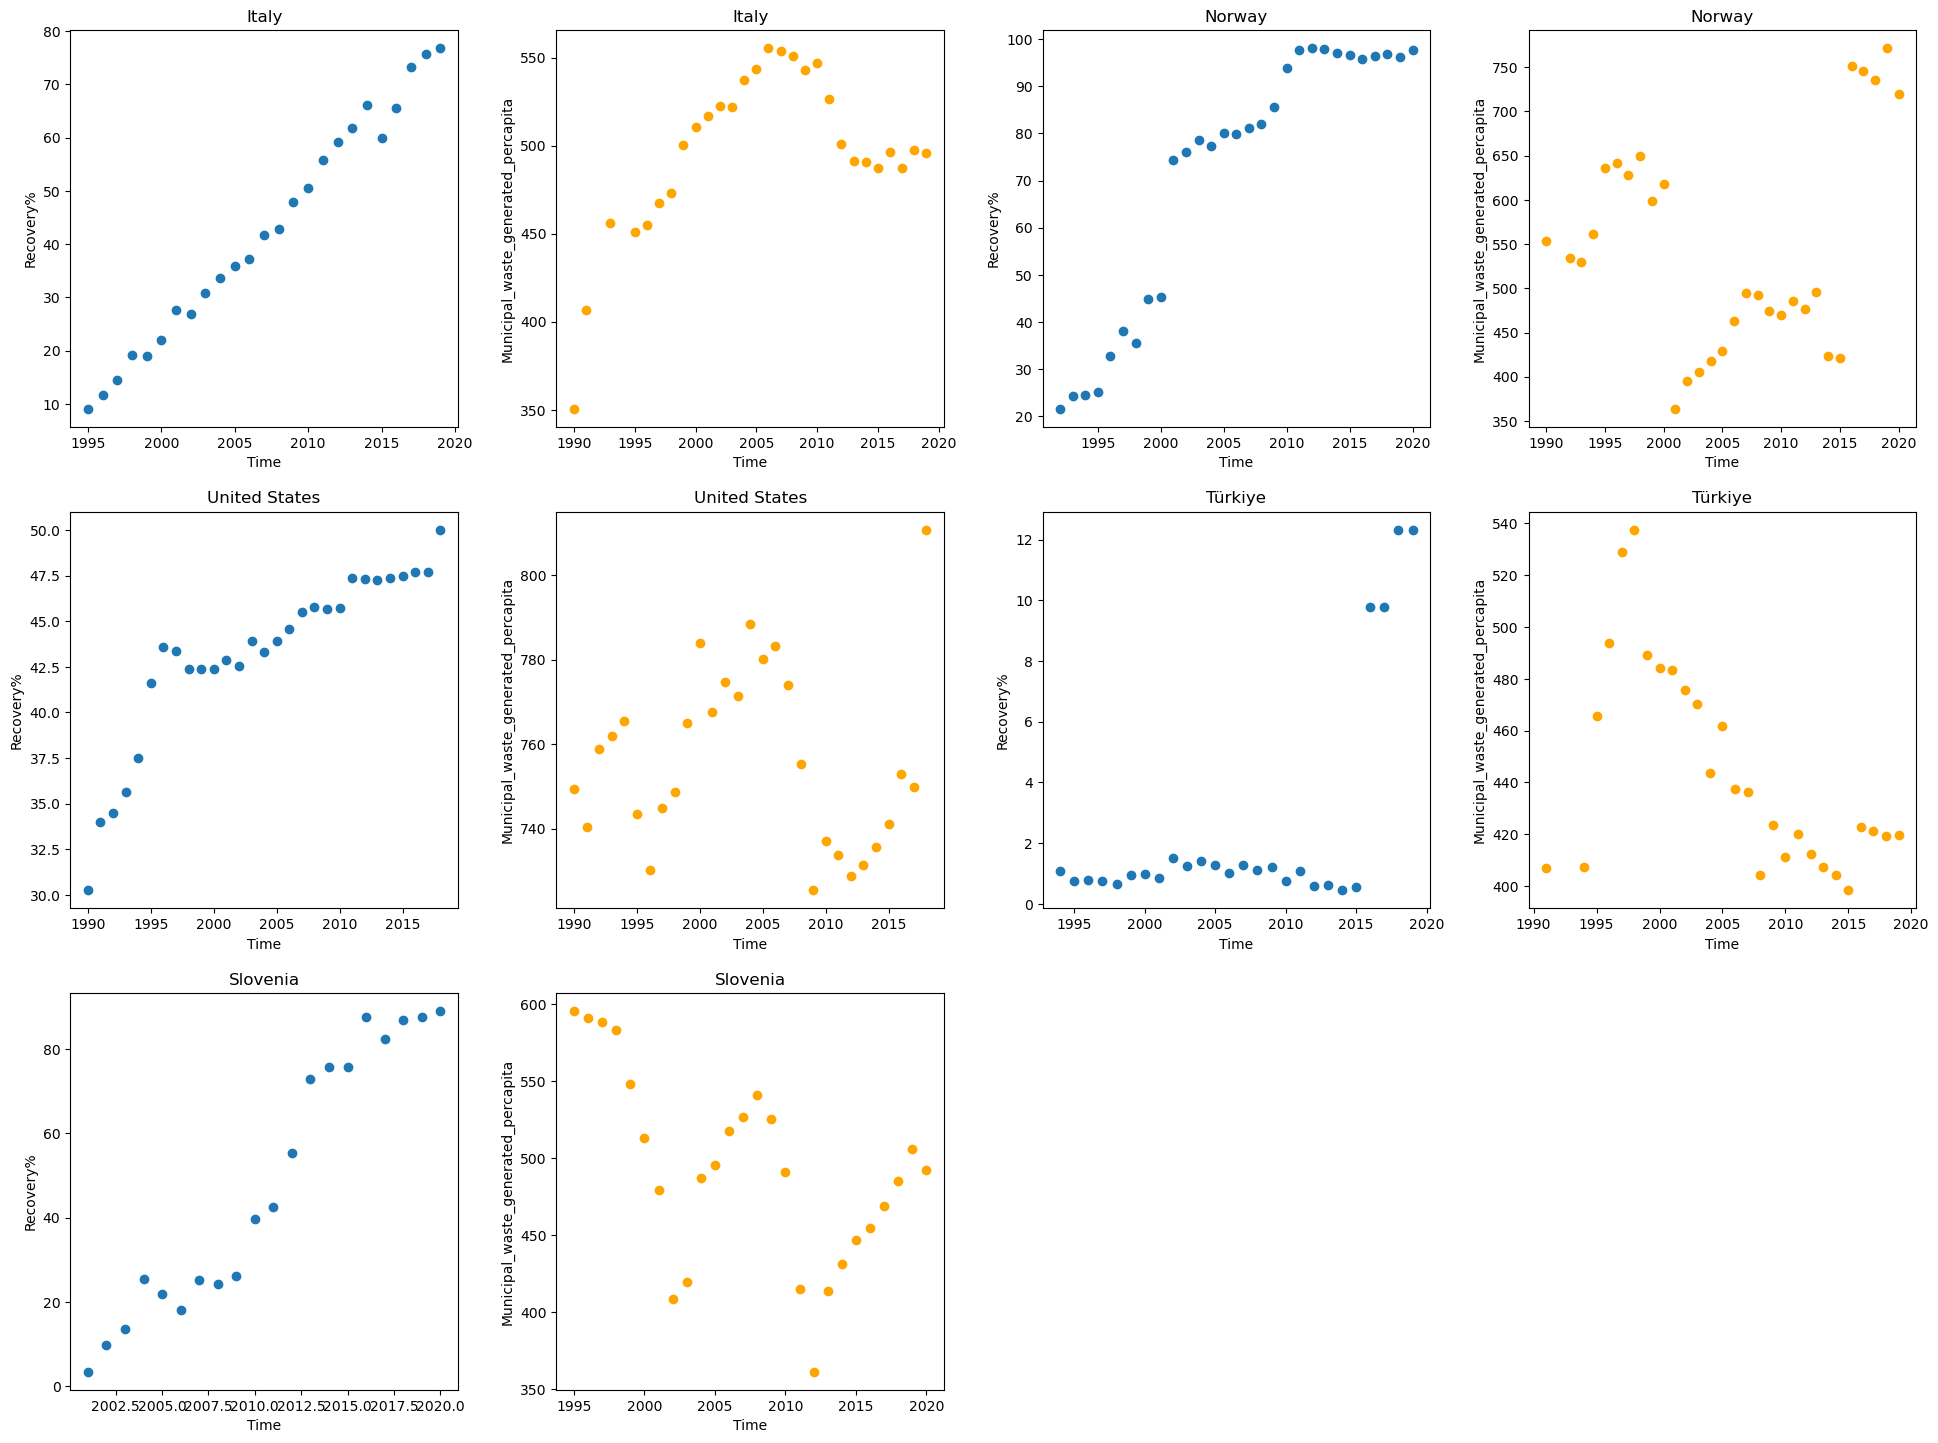

In [20]:
fig, axs = hyp.group_time_series(df1, corr_list3, (20,15), ["Recovery%", "Municipal_waste_generated_percapita"])
plt.show()

#### Observations 5
1. The countries shown in the above group show least correlation between Recovery % and Municipal waste generated per capita. 
1. Italy and Norway seem like they show increasing trends on both variables but on observing Municipal waste generated per capita, it can be seen that it does not change by a large magnitude. 

In [21]:
corr_list3

[['Italy', 0.09],
 ['Norway', -0.04236453201970442],
 ['United States', -0.19408866995073887],
 ['Türkiye', 0.04308428854215206],
 ['Slovenia', -0.08571428571428572]]

#### References and Citation for Code

1] https://stackoverflow.com/questions/22691010/how-to-print-a-groupby-object <br>
2] https://stackoverflow.com/questions/31726643/how-to-plot-in-multiple-subplots <br>
3] https://stackoverflow.com/questions/25239933/how-to-add-a-title-to-each-subplot <br>
4] https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/ <br>
5] https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot <br>
6] https://stackoverflow.com/questions/37154329/jupyter-notebook-command-for-hide-the-output-of-a-cell <br>
7] https://stackoverflow.com/questions/53182464/pandas-delete-a-row-in-a-dataframe-based-on-a-value <br>